# Benson Challenges

In [125]:
from __future__ import print_function, division

import csv
from datetime import datetime
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

Challenge 1
------

In [83]:
# MTA data source: http://web.mta.info/developers/turnstile.html
week_ids = [180106, 171230, 171223]
for week in week_ids:
    print(week)
    with open('./data_local/turnstile_' + str(week) + '.txt') as f:
        reader = csv.reader(f)
        row = [[cell.strip() for cell in row] for row in reader]

180106
171230
171223


In [84]:
len(rows)

597357

In [85]:
rows[1:15]

[['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/30/2017',
  '03:00:00',
  'REGULAR',
  '0006463109',
  '0002187558'],
 ['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/30/2017',
  '07:00:00',
  'REGULAR',
  '0006463119',
  '0002187567'],
 ['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/30/2017',
  '11:00:00',
  'REGULAR',
  '0006463178',
  '0002187654'],
 ['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/30/2017',
  '15:00:00',
  'REGULAR',
  '0006463373',
  '0002187736'],
 ['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/30/2017',
  '19:00:00',
  'REGULAR',
  '0006463712',
  '0002187803'],
 ['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/30/2017',
  '23:00:00',
  'REGULAR',
  '0006463887',
  '0002187833'],
 ['A002',
  'R051',
  '02-00-00',
  '59 ST',
  'NQR456W',
  'BMT',
  '12/31/2017',
  '03:00:00',
  'REGULAR',
  '0006463926',
  '0002187844'],

In [88]:
mta_data_dict = {}
count = 1
for row in rows:
    if count < 5:
        print(row)
        count+=1
    if row != ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
               'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
               'EXITS']:
        mta_data_dict.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']
['A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '12/30/2017', '03:00:00', 'REGULAR', '0006463109', '0002187558']
['A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '12/30/2017', '07:00:00', 'REGULAR', '0006463119', '0002187567']
['A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '12/30/2017', '11:00:00', 'REGULAR', '0006463178', '0002187654']


In [89]:
list(mta_data_dict.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [('NQR456W',
   'BMT',
   '12/30/2017',
   '03:00:00',
   'REGULAR',
   '0006463109',
   '0002187558'),
  ('NQR456W',
   'BMT',
   '12/30/2017',
   '07:00:00',
   'REGULAR',
   '0006463119',
   '0002187567'),
  ('NQR456W',
   'BMT',
   '12/30/2017',
   '11:00:00',
   'REGULAR',
   '0006463178',
   '0002187654'),
  ('NQR456W',
   'BMT',
   '12/30/2017',
   '15:00:00',
   'REGULAR',
   '0006463373',
   '0002187736'),
  ('NQR456W',
   'BMT',
   '12/30/2017',
   '19:00:00',
   'REGULAR',
   '0006463712',
   '0002187803'),
  ('NQR456W',
   'BMT',
   '12/30/2017',
   '23:00:00',
   'REGULAR',
   '0006463887',
   '0002187833'),
  ('NQR456W',
   'BMT',
   '12/31/2017',
   '03:00:00',
   'REGULAR',
   '0006463926',
   '0002187844'),
  ('NQR456W',
   'BMT',
   '12/31/2017',
   '07:00:00',
   'REGULAR',
   '0006463938',
   '0002187856'),
  ('NQR456W',
   'BMT',
   '12/31/2017',
   '11:00:00',
   'REGULAR',
   '0006463980',
   '0002187919'),
  ('NQR456W',
 

**Solution:** the dictionary `mta_data_dict`.

---------------

Challenge 2
----

In [92]:
# create a dict comprehension using list comprehension
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(entries_cumulative))
                                   for _, _, date, time,
                                       _, entries_cumulative, _ in rows]
                       for turnstile, rows in mta_data_dict.items()}

In [93]:
list(datetime_cumulative.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.datetime(2017, 12, 30, 3, 0), 6463109),
  (datetime.datetime(2017, 12, 30, 7, 0), 6463119),
  (datetime.datetime(2017, 12, 30, 11, 0), 6463178),
  (datetime.datetime(2017, 12, 30, 15, 0), 6463373),
  (datetime.datetime(2017, 12, 30, 19, 0), 6463712),
  (datetime.datetime(2017, 12, 30, 23, 0), 6463887),
  (datetime.datetime(2017, 12, 31, 3, 0), 6463926),
  (datetime.datetime(2017, 12, 31, 7, 0), 6463938),
  (datetime.datetime(2017, 12, 31, 11, 0), 6463980),
  (datetime.datetime(2017, 12, 31, 15, 0), 6464138),
  (datetime.datetime(2017, 12, 31, 19, 0), 6464337),
  (datetime.datetime(2017, 12, 31, 23, 0), 6464443),
  (datetime.datetime(2018, 1, 1, 3, 0), 6464475),
  (datetime.datetime(2018, 1, 1, 7, 0), 6464491),
  (datetime.datetime(2018, 1, 1, 11, 0), 6464517),
  (datetime.datetime(2018, 1, 1, 15, 0), 6464623),
  (datetime.datetime(2018, 1, 1, 19, 0), 6464806),
  (datetime.datetime(2018, 1, 1, 23, 0), 6464907),
  (datetime.datetime(201

In [109]:
# sort by date
#c = 1
for turnstile in datetime_cumulative:
#    if c < 5:
 #       print(datetime_cumulative[turnstile])
  #      c += 1
    datetime_cumulative[turnstile].sort()

In [113]:
list(datetime_cumulative.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.datetime(2017, 12, 16, 3, 0), 6446400),
  (datetime.datetime(2017, 12, 16, 7, 0), 6446408),
  (datetime.datetime(2017, 12, 16, 11, 0), 6446457),
  (datetime.datetime(2017, 12, 16, 15, 0), 6446670),
  (datetime.datetime(2017, 12, 16, 19, 0), 6446975),
  (datetime.datetime(2017, 12, 16, 23, 0), 6447190),
  (datetime.datetime(2017, 12, 17, 3, 0), 6447232),
  (datetime.datetime(2017, 12, 17, 7, 0), 6447238),
  (datetime.datetime(2017, 12, 17, 11, 0), 6447283),
  (datetime.datetime(2017, 12, 17, 15, 0), 6447455),
  (datetime.datetime(2017, 12, 17, 19, 0), 6447714),
  (datetime.datetime(2017, 12, 17, 23, 0), 6447857),
  (datetime.datetime(2017, 12, 18, 3, 0), 6447885),
  (datetime.datetime(2017, 12, 18, 7, 0), 6447901),
  (datetime.datetime(2017, 12, 18, 11, 0), 6448042),
  (datetime.datetime(2017, 12, 18, 15, 0), 6448293),
  (datetime.datetime(2017, 12, 18, 19, 0), 6449095),
  (datetime.datetime(2017, 12, 18, 23, 0), 6449415),
  (datetime.

In [111]:
datetime_count_times = {turnstile: [[rows[i][0], # datetime first
                                      # delta on entries
                                     rows[i+1][1] - rows[i][1],
                                     # delta on datetime
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [112]:
list(datetime_count_times.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [[datetime.datetime(2017, 12, 16, 3, 0), 8, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 16, 7, 0), 49, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 16, 11, 0), 213, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 16, 15, 0), 305, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 16, 19, 0), 215, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 16, 23, 0), 42, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 17, 3, 0), 6, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 17, 7, 0), 45, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 17, 11, 0), 172, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 17, 15, 0), 259, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 17, 19, 0), 143, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 17, 23, 0), 28, datetime.timedelta(0, 14400)],
  [datetime.datetime(201

In [117]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

In [119]:
list(datetime_counts.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.datetime(2017, 12, 16, 3, 0), 8),
  (datetime.datetime(2017, 12, 16, 7, 0), 49),
  (datetime.datetime(2017, 12, 16, 11, 0), 213),
  (datetime.datetime(2017, 12, 16, 15, 0), 305),
  (datetime.datetime(2017, 12, 16, 19, 0), 215),
  (datetime.datetime(2017, 12, 16, 23, 0), 42),
  (datetime.datetime(2017, 12, 17, 3, 0), 6),
  (datetime.datetime(2017, 12, 17, 7, 0), 45),
  (datetime.datetime(2017, 12, 17, 11, 0), 172),
  (datetime.datetime(2017, 12, 17, 15, 0), 259),
  (datetime.datetime(2017, 12, 17, 19, 0), 143),
  (datetime.datetime(2017, 12, 17, 23, 0), 28),
  (datetime.datetime(2017, 12, 18, 3, 0), 16),
  (datetime.datetime(2017, 12, 18, 7, 0), 141),
  (datetime.datetime(2017, 12, 18, 11, 0), 251),
  (datetime.datetime(2017, 12, 18, 15, 0), 802),
  (datetime.datetime(2017, 12, 18, 19, 0), 320),
  (datetime.datetime(2017, 12, 18, 23, 0), 26),
  (datetime.datetime(2017, 12, 19, 3, 0), 10),
  (datetime.datetime(2017, 12, 19, 7, 0), 125),

**Solution:** the dictionary `datetime_counts`.

---------------

Challenge 3
----

In [124]:
# Time intervals
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print(Counter(all_times).most_common(20))

[(4.0, 538452), (4.2, 36325), (0.02222222222222222, 902), (8.0, 716), (0.022500000000000003, 650), (4.433333333333334, 419), (0.023055555555555555, 130), (0.02277777777777778, 117), (0.02388888888888889, 72), (0.02333333333333333, 55), (0.2902777777777778, 46), (0.0175, 42), (12.0, 41), (4.199722222222222, 41), (1.833611111111111, 35), (0.021944444444444444, 35), (0.021666666666666667, 33), (0.26972222222222225, 32), (0.07055555555555555, 32), (1.3233333333333335, 31)]


**Q:** These counts are for every n hours. What is n?  
**A:** 4 hours for most observations.

In [245]:
# dictionary of dictionaries
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())
    

list(day_counts.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.date(2017, 12, 16), 832),
  (datetime.date(2017, 12, 17), 653),
  (datetime.date(2017, 12, 18), 1556),
  (datetime.date(2017, 12, 19), 1572),
  (datetime.date(2017, 12, 20), 1618),
  (datetime.date(2017, 12, 21), 1642),
  (datetime.date(2017, 12, 22), 1567),
  (datetime.date(2017, 12, 23), 685),
  (datetime.date(2017, 12, 24), 565),
  (datetime.date(2017, 12, 25), 228),
  (datetime.date(2017, 12, 26), 1325),
  (datetime.date(2017, 12, 27), 1493),
  (datetime.date(2017, 12, 28), 1425),
  (datetime.date(2017, 12, 29), 1548),
  (datetime.date(2017, 12, 30), 817),
  (datetime.date(2017, 12, 31), 549),
  (datetime.date(2018, 1, 1), 444),
  (datetime.date(2018, 1, 2), 1484),
  (datetime.date(2018, 1, 3), 1574),
  (datetime.date(2018, 1, 4), 832),
  (datetime.date(2018, 1, 5), 1371)])

**Solution:** the dictionary `day_counts`.

---------------

Challenge 4
----

In [126]:
%matplotlib inline

In [127]:
# Pick a turnstile
my_turnstile = day_counts[('A002', 'R051', '02-00-00', '59 ST')]
my_turnstile

[(datetime.date(2017, 12, 16), 832),
 (datetime.date(2017, 12, 17), 653),
 (datetime.date(2017, 12, 18), 1556),
 (datetime.date(2017, 12, 19), 1572),
 (datetime.date(2017, 12, 20), 1618),
 (datetime.date(2017, 12, 21), 1642),
 (datetime.date(2017, 12, 22), 1567),
 (datetime.date(2017, 12, 23), 685),
 (datetime.date(2017, 12, 24), 565),
 (datetime.date(2017, 12, 25), 228),
 (datetime.date(2017, 12, 26), 1325),
 (datetime.date(2017, 12, 27), 1493),
 (datetime.date(2017, 12, 28), 1425),
 (datetime.date(2017, 12, 29), 1548),
 (datetime.date(2017, 12, 30), 817),
 (datetime.date(2017, 12, 31), 549),
 (datetime.date(2018, 1, 1), 444),
 (datetime.date(2018, 1, 2), 1484),
 (datetime.date(2018, 1, 3), 1574),
 (datetime.date(2018, 1, 4), 832),
 (datetime.date(2018, 1, 5), 1371)]

In [135]:
# Make a list of dates and a list of counts for the turnstile
dates = []
counts = []
for i in range(len(my_turnstile)):
    dates.append(my_turnstile[i][0])
    counts.append(my_turnstile[i][1])


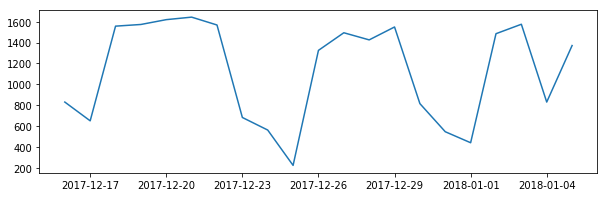

In [136]:
# Plotting time!
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

Challenge 5
----

In [246]:
# combine turnstiles in the same ControlArea/Unit/Station combo
day_counts_cus = {}
for turnstile, rows in day_counts.items():
    cus = (turnstile[0], turnstile[1], turnstile[3])
    rows_by_cus = day_counts_cus.get(cus, [])
    for day, count in rows:
        matched_by_day = 0
        for i in range(len(rows_by_cus)):
            if rows_by_cus[i][0] == day:
                rows_by_cus[i][1] = rows_by_cus[i][1] + count
                matched_by_day = 1
        if matched_by_day == 0:
            rows_by_cus.append([day, count])

        day_counts_cus[cus] = rows_by_cus
    

list(day_counts_cus.items())[0]

(('A002', 'R051', '59 ST'),
 [[datetime.date(2017, 12, 16), 8413],
  [datetime.date(2017, 12, 17), 6638],
  [datetime.date(2017, 12, 18), 14128],
  [datetime.date(2017, 12, 19), 14483],
  [datetime.date(2017, 12, 20), 14574],
  [datetime.date(2017, 12, 21), 14364],
  [datetime.date(2017, 12, 22), 13442],
  [datetime.date(2017, 12, 23), 6654],
  [datetime.date(2017, 12, 24), 5122],
  [datetime.date(2017, 12, 25), 3036],
  [datetime.date(2017, 12, 26), 11480],
  [datetime.date(2017, 12, 27), 14014],
  [datetime.date(2017, 12, 28), 13590],
  [datetime.date(2017, 12, 29), 13523],
  [datetime.date(2017, 12, 30), 7840],
  [datetime.date(2017, 12, 31), 5908],
  [datetime.date(2018, 1, 1), 4703],
  [datetime.date(2018, 1, 2), 12747],
  [datetime.date(2018, 1, 3), 13691],
  [datetime.date(2018, 1, 4), 8369],
  [datetime.date(2018, 1, 5), 11871]])

**Solution:** the dictionary `day_counts_cus`.

---------------

Challenge 6
----

In [247]:
# combine turnstiles day counts by station
day_counts_station = {}
for cus, rows in day_counts_cus.items():
        station = (cus[2])
        rows_by_station = day_counts_station.get(station, [])
        for day, count in rows:
            matched_by_day = 0
            for i in range(len(rows_by_station)):
                if rows_by_station[i][0] == day:
                    rows_by_station[i][1] = rows_by_station[i][1] + count
                    matched_by_day = 1
            if matched_by_day == 0:
                rows_by_station.append([day, count])

            day_counts_station[station] = rows_by_station
    

list(day_counts_station.items())[0]

('59 ST',
 [[datetime.date(2017, 12, 16), 41247],
  [datetime.date(2017, 12, 17), 31003],
  [datetime.date(2017, 12, 18), 71101],
  [datetime.date(2017, 12, 19), 74283],
  [datetime.date(2017, 12, 20), 72999],
  [datetime.date(2017, 12, 21), 72714],
  [datetime.date(2017, 12, 22), 66266],
  [datetime.date(2017, 12, 23), 33214],
  [datetime.date(2017, 12, 24), 25721],
  [datetime.date(2017, 12, 25), 14017],
  [datetime.date(2017, 12, 26), 56331],
  [datetime.date(2017, 12, 27), 65196],
  [datetime.date(2017, 12, 28), 63707],
  [datetime.date(2017, 12, 29), 61627],
  [datetime.date(2017, 12, 30), 35902],
  [datetime.date(2017, 12, 31), 27069],
  [datetime.date(2018, 1, 1), 19077],
  [datetime.date(2018, 1, 2), 59122],
  [datetime.date(2018, 1, 3), 65515],
  [datetime.date(2018, 1, 4), 37344],
  [datetime.date(2018, 1, 5), 56234]])

**Solution:** the dictionary `day_counts_station`.

---------------

Challenge 7
----

In [235]:
# Plot the time series for a station.
my_station = day_counts_station['59 ST'].copy()
my_station

[[datetime.date(2017, 12, 16), 41247],
 [datetime.date(2017, 12, 17), 31003],
 [datetime.date(2017, 12, 18), 71101],
 [datetime.date(2017, 12, 19), 74283],
 [datetime.date(2017, 12, 20), 72999],
 [datetime.date(2017, 12, 21), 72714],
 [datetime.date(2017, 12, 22), 66266],
 [datetime.date(2017, 12, 23), 33214],
 [datetime.date(2017, 12, 24), 25721],
 [datetime.date(2017, 12, 25), 14017],
 [datetime.date(2017, 12, 26), 56331],
 [datetime.date(2017, 12, 27), 65196],
 [datetime.date(2017, 12, 28), 63707],
 [datetime.date(2017, 12, 29), 61627],
 [datetime.date(2017, 12, 30), 35902],
 [datetime.date(2017, 12, 31), 27069],
 [datetime.date(2018, 1, 1), 19077],
 [datetime.date(2018, 1, 2), 59122],
 [datetime.date(2018, 1, 3), 65515],
 [datetime.date(2018, 1, 4), 37344],
 [datetime.date(2018, 1, 5), 56234]]

In [236]:
# Make a list of dates and a list of counts for the station
dates_station = []
counts_station = []
for i in range(len(my_station)):
    dates_station.append(my_station[i][0])
    counts_station.append(my_station[i][1])


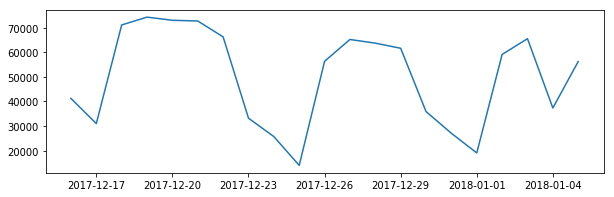

In [237]:
# Plot the time series for the station
plt.figure(figsize=(10,3))
plt.plot(dates_station,counts_station)

Challenge 8
----
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [238]:
#import datetime
for i in range(len(my_station)):
  # Week num starting with Sat = 0
    if my_station[i][0].weekday() == 5:
        week_day = "1. Sat"
    elif my_station[i][0].weekday() == 6:
        week_day = "2. Sun"
    elif my_station[i][0].weekday() == 0:
        week_day = "3. Mon"
    elif my_station[i][0].weekday() == 1:
        week_day = "4. Tue"
    elif my_station[i][0].weekday() == 2:
        week_day = "5. Wed"
    elif my_station[i][0].weekday() == 3:
        week_day = "6. Thu"
    elif my_station[i][0].weekday() == 4:
        week_day = "7. Fri"
    my_station[i].append(week_day)
my_station

[[datetime.date(2017, 12, 16), 41247, '1. Sat'],
 [datetime.date(2017, 12, 17), 31003, '2. Sun'],
 [datetime.date(2017, 12, 18), 71101, '3. Mon'],
 [datetime.date(2017, 12, 19), 74283, '4. Tue'],
 [datetime.date(2017, 12, 20), 72999, '5. Wed'],
 [datetime.date(2017, 12, 21), 72714, '6. Thu'],
 [datetime.date(2017, 12, 22), 66266, '7. Fri'],
 [datetime.date(2017, 12, 23), 33214, '1. Sat'],
 [datetime.date(2017, 12, 24), 25721, '2. Sun'],
 [datetime.date(2017, 12, 25), 14017, '3. Mon'],
 [datetime.date(2017, 12, 26), 56331, '4. Tue'],
 [datetime.date(2017, 12, 27), 65196, '5. Wed'],
 [datetime.date(2017, 12, 28), 63707, '6. Thu'],
 [datetime.date(2017, 12, 29), 61627, '7. Fri'],
 [datetime.date(2017, 12, 30), 35902, '1. Sat'],
 [datetime.date(2017, 12, 31), 27069, '2. Sun'],
 [datetime.date(2018, 1, 1), 19077, '3. Mon'],
 [datetime.date(2018, 1, 2), 59122, '4. Tue'],
 [datetime.date(2018, 1, 3), 65515, '5. Wed'],
 [datetime.date(2018, 1, 4), 37344, '6. Thu'],
 [datetime.date(2018, 1, 5),

In [239]:
week_count_list_1 = my_station[:7]
week_count_list_2 = my_station[7:14]
week_count_list_3 = my_station[14:]
week_count_list_3

[[datetime.date(2017, 12, 30), 35902, '1. Sat'],
 [datetime.date(2017, 12, 31), 27069, '2. Sun'],
 [datetime.date(2018, 1, 1), 19077, '3. Mon'],
 [datetime.date(2018, 1, 2), 59122, '4. Tue'],
 [datetime.date(2018, 1, 3), 65515, '5. Wed'],
 [datetime.date(2018, 1, 4), 37344, '6. Thu'],
 [datetime.date(2018, 1, 5), 56234, '7. Fri']]

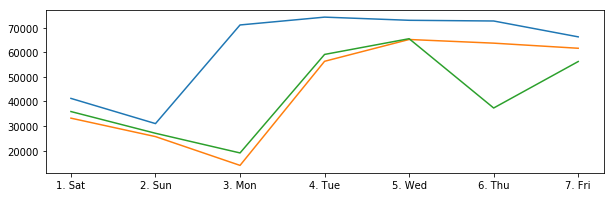

In [241]:
# Plot the week's time series for the station
weekdays_station_1 = []
counts_station_1 = []
for i in range(len(week_count_list_1)):
    weekdays_station_1.append(week_count_list_1[i][2])
    counts_station_1.append(week_count_list_1[i][1])
    
plt.figure(figsize=(10,3))
plt.plot(weekdays_station_1,counts_station_1)

weekdays_station_2 = []
counts_station_2 = []
for i in range(len(week_count_list_2)):
    weekdays_station_2.append(week_count_list_2[i][2])
    counts_station_2.append(week_count_list_2[i][1])
    
plt.plot(weekdays_station_2,counts_station_2)

weekdays_station_3 = []
counts_station_3 = []
for i in range(len(week_count_list_3)):
    weekdays_station_3.append(week_count_list_3[i][2])
    counts_station_3.append(week_count_list_3[i][1])
    
plt.plot(weekdays_station_3,counts_station_3)

Challenge 9
----
Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate.

In [289]:
# combine turnstiles day counts by station
counts_station = {}
for station, rows in day_counts_station.items():
        st = station
        count_by_station = counts_station.get(st, 0)
        for day, count in rows:
            if (count_by_station) == 0:
                count_by_station=(count)
            else:
                count_by_station = count_by_station + count
        counts_station[st] = count_by_station

list(counts_station.items())[0:5]

[('59 ST', 1049689),
 ('5 AV/59 ST', 280683),
 ('57 ST-7 AV', 501373),
 ('49 ST', 480045),
 ('TIMES SQ-42 ST', 1605643)]

In [293]:
sorted_by_count = sorted(list(counts_station.items()), key=lambda tup: tup[1], reverse=True)
sorted_by_count[0:10]

[('34 ST-PENN STA', 2555837),
 ('GRD CNTRL-42 ST', 2112765),
 ('34 ST-HERALD SQ', 1882263),
 ('14 ST-UNION SQ', 1640428),
 ('TIMES SQ-42 ST', 1605643),
 ('23 ST', 1517925),
 ('42 ST-PORT AUTH', 1497873),
 ('FULTON ST', 1434021),
 ('86 ST', 1348691),
 ('47-50 STS ROCK', 1139209)]

Challenge 10
----

In [298]:
total_ridership_counts = []
for i in range(len(sorted_by_count)):
    total_ridership_counts.append(sorted_by_count[i][1])
    
total_ridership_counts[0:10]

[2555837,
 2112765,
 1882263,
 1640428,
 1605643,
 1517925,
 1497873,
 1434021,
 1348691,
 1139209]

(array([ 275.,   63.,   16.,    5.,    5.,    4.,    2.,    1.,    1.,    1.]),
 array([  7.68000000e+02,   2.56274900e+05,   5.11781800e+05,
          7.67288700e+05,   1.02279560e+06,   1.27830250e+06,
          1.53380940e+06,   1.78931630e+06,   2.04482320e+06,
          2.30033010e+06,   2.55583700e+06]),
 <a list of 10 Patch objects>)

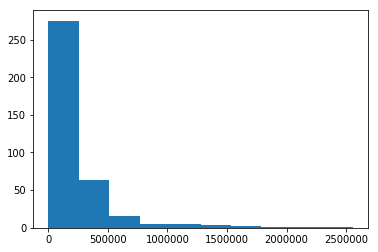

In [299]:
plt.hist(total_ridership_counts)

The graph shows that most stations have low volume traffic, and a few stations have very high traffic.

<Container object of 5 artists>

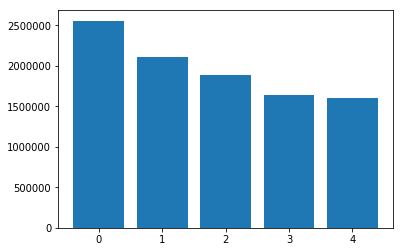

In [306]:
total_ridership_values = []
for i in range(len(sorted_by_count)):
    total_ridership_values.append(sorted_by_count[i][0])
 

indices = range(len(total_ridership_values))
plt.bar(indices[:5],total_ridership_counts[:5])